# Importing libraries

In [ ]:
import io
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
import matplotlib.pyplot as plt

from google.colab import files

# Importing data

In [ ]:
data = files.upload()

Saving 243_layers_w_defect_641.csv to 243_layers_w_defect_641.csv


In [ ]:
data = '243_layers_w_defect_641.csv'

data = pd.read_csv(data, sep=',')

data

,Unnamed: 0,s_d2,s_d3,s_d4,s_d5,s_d6,s_d7,s_d8,s_d9,s_d10,s_d12,s_d16,s_d19,s_d20,s_d23,s_d24,s_d26,s_d28
0,0,0,0,0,0,0,0,0,0,2,77,62,62,62,67,62,67,62
1,1,383,394,372,329,330,338,298,339,409,497,567,552,616,587,588,571,621
2,2,260,212,214,211,170,231,223,272,216,582,591,568,575,569,570,587,530
3,3,298,288,252,260,244,328,284,375,269,600,625,596,650,573,617,649,590
4,4,309,252,255,264,226,295,257,334,246,612,642,591,653,595,615,645,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,238,729,656,687,633,593,724,641,695,664,771,861,827,2427,2249,758,791,786
239,239,758,642,672,639,586,754,628,671,688,765,880,790,2431,2268,732,784,739
240,240,693,649,660,596,543,724,641,655,647,824,811,828,3367,2219,768,774,789
241,241,651,638,666,578,590,770,633,651,634,779,838,818,3444,2270,767,793,785


## Defining layer datasets for phases 1 & 2

In [ ]:
# defining dataset for layer 100

row100 = data.iloc[[100]]

row100 = row100.drop(columns = ['Unnamed: 0','s_d16','s_d19','s_d20','s_d23','s_d24','s_d26','s_d28'], axis = 1)

row100

,s_d2,s_d3,s_d4,s_d5,s_d6,s_d7,s_d8,s_d9,s_d10,s_d12
100,344,355,314,269,282,362,281,318,309,469


In [ ]:
# defining dataset for layer 173

row173 = data.iloc[[173]]

row173 = row173.drop(columns = ['Unnamed: 0','s_d16','s_d19','s_d20','s_d23','s_d24','s_d26','s_d28'], axis = 1)

row173

,s_d2,s_d3,s_d4,s_d5,s_d6,s_d7,s_d8,s_d9,s_d10,s_d12
173,436,371,359,357,298,400,347,409,374,483


In [ ]:
# defining dataset for layer 200

row200 = data.iloc[[200]]

row200 = row200.drop(columns = ['Unnamed: 0','s_d16','s_d19','s_d20','s_d23','s_d24','s_d26','s_d28'], axis = 1)

row200

,s_d2,s_d3,s_d4,s_d5,s_d6,s_d7,s_d8,s_d9,s_d10,s_d12
200,616,568,566,544,465,578,500,565,548,684


In [ ]:
# defining dataset for layer 100

P2_row100 = data.iloc[[100]]

P2_row100 = P2_row100.drop(columns = ['Unnamed: 0','s_d19','s_d20','s_d24','s_d26','s_d28'], axis = 1)

P2_row100

,s_d2,s_d3,s_d4,s_d5,s_d6,s_d7,s_d8,s_d9,s_d10,s_d12,s_d16,s_d23
100,344,355,314,269,282,362,281,318,309,469,478,605


In [ ]:
# defining dataset for layer 173

P2_row173 = data.iloc[[173]]

P2_row173 = P2_row173.drop(columns = ['Unnamed: 0','s_d19','s_d20','s_d24','s_d26','s_d28'], axis = 1)

P2_row173

,s_d2,s_d3,s_d4,s_d5,s_d6,s_d7,s_d8,s_d9,s_d10,s_d12,s_d16,s_d23
173,436,371,359,357,298,400,347,409,374,483,527,1700


In [ ]:
# defining dataset for layer 200

P2_row200 = data.iloc[[200]]

P2_row200 = P2_row200.drop(columns = ['Unnamed: 0','s_d19','s_d20','s_d24','s_d26','s_d28'], axis = 1)

P2_row200

,s_d2,s_d3,s_d4,s_d5,s_d6,s_d7,s_d8,s_d9,s_d10,s_d12,s_d16,s_d23
200,616,568,566,544,465,578,500,565,548,684,750,2705


##EWMA

In [ ]:
class EWMA:
    def fit(self,data,lamda,mean):

        self.X     = data
        self.z     = np.zeros(len(data))
        self.lamda = lamda
        self.mean  = mean
        self.z[0]  = self.mean
        for i in range(1,len(self.z)):
            self.z[i] = self.lamda*self.X[i] + (1-self.lamda)*self.z[i-1]

    def  ControlChart(self,L,sigma):
        # L     : usually 3
        ucl = np.zeros(len(self.X))
        lcl = np.zeros(len(self.X))
        I   = np.arange(1,len(self.X)+1)

        for i in range(len(self.X)):
            ucl[i] = self.mean + L*sigma*np.sqrt((self.lamda / (2 - self.lamda))*(1-(1-self.lamda)**(2*I[i])))
            lcl[i] = self.mean - L*sigma*np.sqrt((self.lamda / (2 - self.lamda))*(1-(1-self.lamda)**(2*I[i])))

        plt.figure(figsize=(15,5))
        plt.plot(self.z,marker="o",color="k",label="$Z_i$")
        plt.plot([self.mean]*len(self.X),color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("EWMA Control Chart")
        plt.legend(loc="upper left")
        plt.show()

###EWMA Layer 100

In [ ]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [ ]:
row100_array = row100.values

row100_array = row100_array.flatten()

row100_array

array([344, 355, 314, 269, 282, 362, 281, 318, 309, 469])

In [ ]:
row100_array_reshape = np.reshape(row100_array, (5,2))
row100_array_reshape

array([[344, 355],
       [314, 269],
       [282, 362],
       [281, 318],
       [309, 469]])

In [ ]:
for group in row100_array_reshape:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in plotting dataset, ', m)

points in plotting dataset,  5


In [ ]:
c4=0.7979
x_bar_bar=statistics.mean(x_bar)
s_bar=statistics.mean(s)
sigma_hat=s_bar/c4
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat)

process mean is,  330.3
process standard deviation is,  41.73455320215565


In [ ]:
row100_array_1 = row100_array_reshape.flatten()

In [ ]:
row100_array_1

array([344, 355, 314, 269, 282, 362, 281, 318, 309, 469])

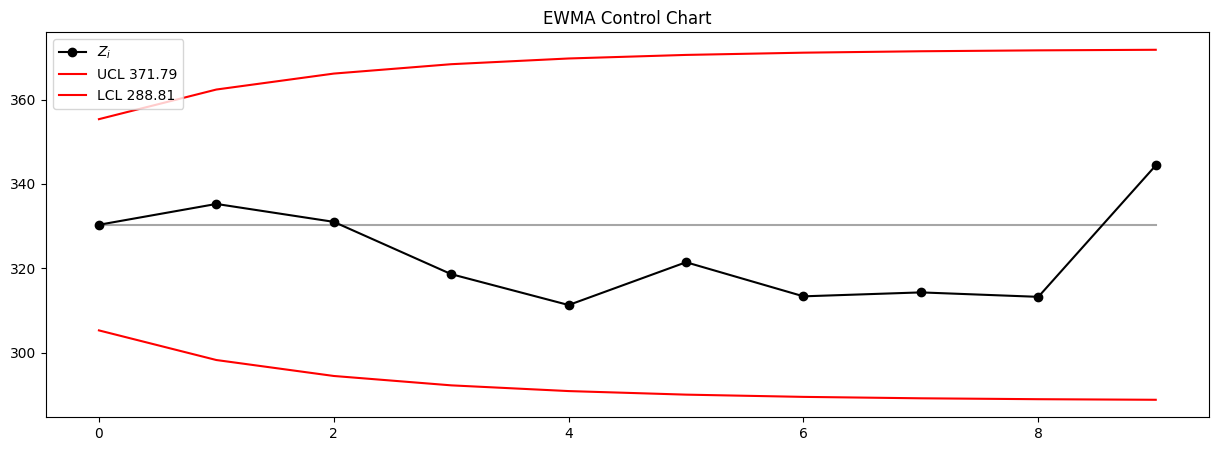

In [ ]:
chart = EWMA()
chart.fit(data=row100_array_1,lamda=0.2,mean=330.3)
chart.ControlChart(L=3,sigma=41.73)

In [ ]:
P2_row100_array = P2_row100.values
P2_row100_array

array([[344, 355, 314, 269, 282, 362, 281, 318, 309, 469, 478, 605]])

In [ ]:
P2_row100_array_reshape = np.reshape(P2_row100_array, (6,2))
P2_row100_array_reshape

array([[344, 355],
       [314, 269],
       [282, 362],
       [281, 318],
       [309, 469],
       [478, 605]])

In [ ]:
P2_row100_array_1 = P2_row100_array.flatten()
P2_row100_array_1

array([344, 355, 314, 269, 282, 362, 281, 318, 309, 469, 478, 605])

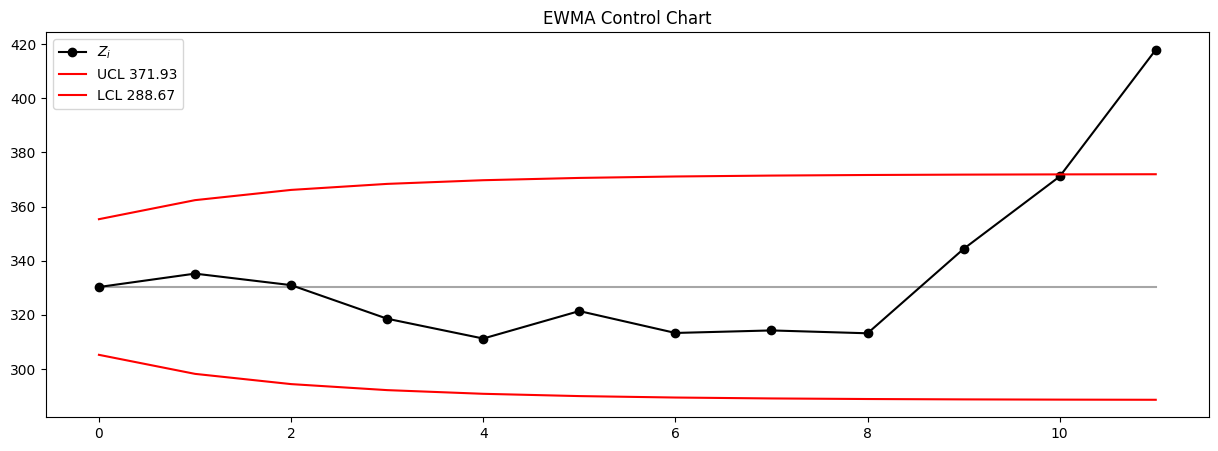

In [ ]:
chart = EWMA()
chart.fit(data=P2_row100_array_1,lamda=0.2,mean=330.3)
chart.ControlChart(L=3,sigma=41.73)

###EWMA Layer 173

In [ ]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [ ]:
row173_array = row173.values

row173_array = row173_array.flatten()

row173_array

array([436, 371, 359, 357, 298, 400, 347, 409, 374, 483])

In [ ]:
row173_array_reshape = np.reshape(row173_array, (5,2))
row173_array_reshape

array([[436, 371],
       [359, 357],
       [298, 400],
       [347, 409],
       [374, 483]])

In [ ]:
for group in row173_array_reshape:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in plotting dataset, ', m)

points in plotting dataset,  10


In [ ]:
c4=0.7979
x_bar_bar=statistics.mean(x_bar)
s_bar=statistics.mean(s)
sigma_hat=s_bar/c4
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat)

process mean is,  383.4
process standard deviation is,  42.61185612232109


In [ ]:
row173_array_1 = row173_array_reshape.flatten()

In [ ]:
row173_array_1

array([436, 371, 359, 357, 298, 400, 347, 409, 374, 483])

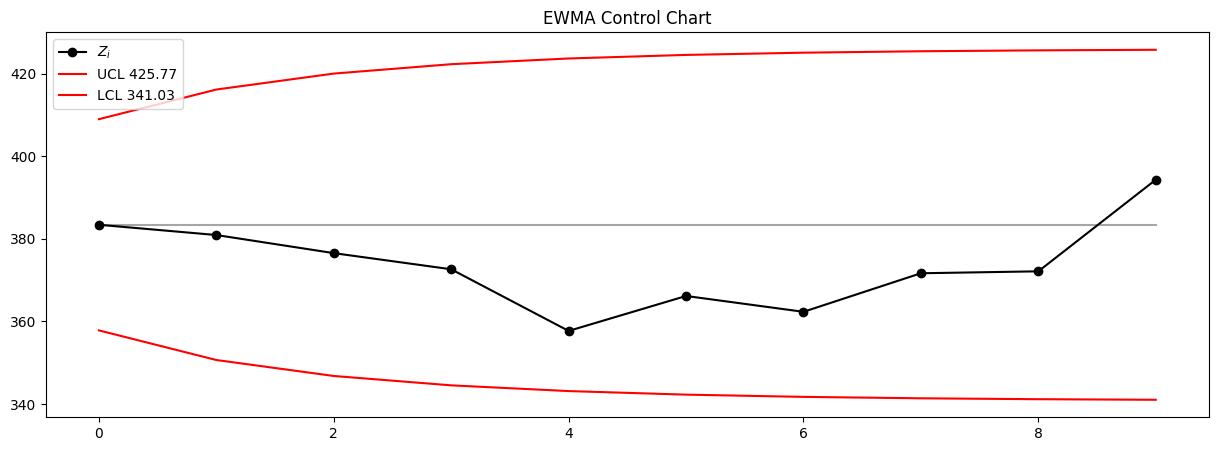

In [ ]:
chart = EWMA()
chart.fit(data=row173_array_1,lamda=0.2,mean=x_bar_bar)
chart.ControlChart(L=3,sigma=sigma_hat)

In [ ]:
P2_row173_array = P2_row173.values
P2_row173_array

array([[ 436,  371,  359,  357,  298,  400,  347,  409,  374,  483,  527,
        1700]])

In [ ]:
P2_row173_array_reshape = np.reshape(P2_row173_array, (6,2))
P2_row173_array_reshape

array([[ 436,  371],
       [ 359,  357],
       [ 298,  400],
       [ 347,  409],
       [ 374,  483],
       [ 527, 1700]])

In [ ]:
P2_row173_array_1 = P2_row173_array.flatten()
P2_row173_array_1

array([ 436,  371,  359,  357,  298,  400,  347,  409,  374,  483,  527,
       1700])

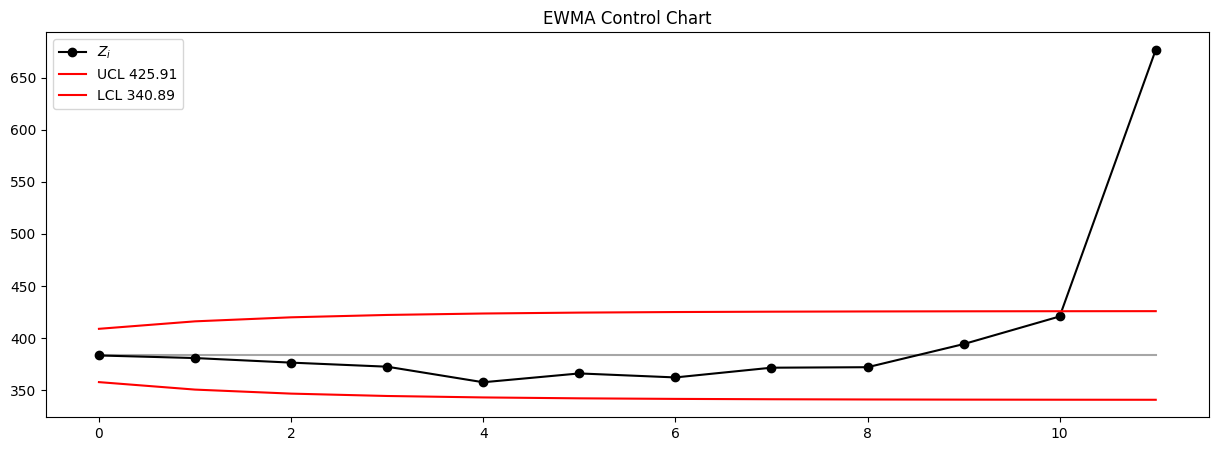

In [ ]:
chart = EWMA()
chart.fit(data=P2_row173_array_1,lamda=0.2,mean=x_bar_bar)
chart.ControlChart(L=3,sigma=sigma_hat)

###EWMA Layer 200

In [ ]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [ ]:
row200_array = row200.values

row200_array = row200_array.flatten()

row200_array

array([616, 568, 566, 544, 465, 578, 500, 565, 548, 684])

In [ ]:
row200_array_reshape = np.reshape(row200_array, (5,2))
row200_array_reshape

array([[616, 568],
       [566, 544],
       [465, 578],
       [500, 565],
       [548, 684]])

In [ ]:
for group in row200_array_reshape:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in plotting dataset, ', m)

points in plotting dataset,  5


In [ ]:
c4=0.7979
x_bar_bar=statistics.mean(x_bar)
s_bar=statistics.mean(s)
sigma_hat=s_bar/c4
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat)

process mean is,  563.4
process standard deviation is,  48.12633162050382


In [ ]:
row200_array_1 = row200_array_reshape.flatten()

In [ ]:
row200_array_1

array([616, 568, 566, 544, 465, 578, 500, 565, 548, 684])

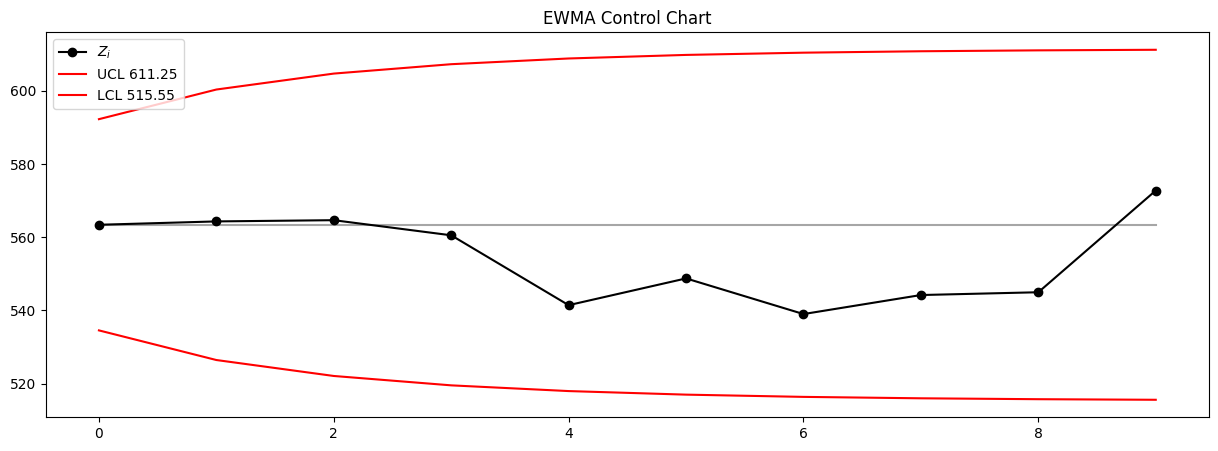

In [ ]:
chart = EWMA()
chart.fit(data=row200_array_1,lamda=0.2,mean=x_bar_bar)
chart.ControlChart(L=3,sigma=sigma_hat)

In [ ]:
P2_row200_array = P2_row200.values
P2_row200_array

array([[ 616,  568,  566,  544,  465,  578,  500,  565,  548,  684,  750,
        2705]])

In [ ]:
P2_row200_array_reshape = np.reshape(P2_row200_array, (6,2))
P2_row200_array_reshape

array([[ 616,  568],
       [ 566,  544],
       [ 465,  578],
       [ 500,  565],
       [ 548,  684],
       [ 750, 2705]])

In [ ]:
P2_row200_array_1 = P2_row200_array.flatten()
P2_row200_array_1

array([ 616,  568,  566,  544,  465,  578,  500,  565,  548,  684,  750,
       2705])

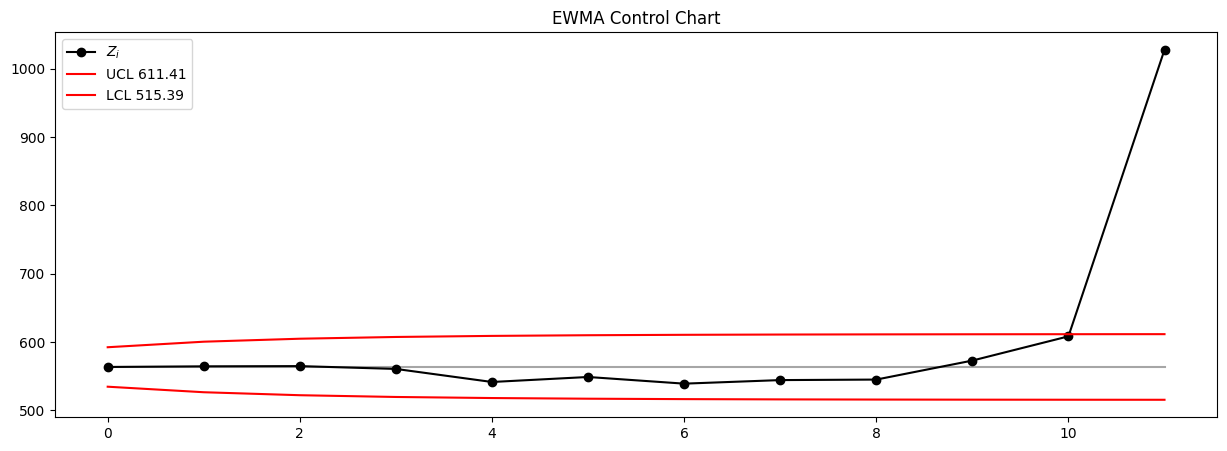

In [ ]:
chart = EWMA()
chart.fit(data=P2_row200_array_1,lamda=0.2,mean=x_bar_bar)
chart.ControlChart(L=3,sigma=sigma_hat)

## CUSUM - Mean

In [ ]:
class CUSUM:
    def fit(self,data, h, k, mu, sigma):

        self.X = data
        self.cplus = np.zeros(len(data))
        self.cminus = np.zeros(len(data))
        self.H = h * sigma
        self.K = k * sigma
        self.mean  = mu
        self.sigma = sigma
        self.cplus[0]  = 0
        self.cminus[0] = 0
        for i in range(1,len(self.X)):
            self.cplus[i] = max(0, self.X[i] -(self.mean+self.K) + self.cplus[i-1])
            self.cminus[i] = max(0, (self.mean-self.K) - self.X[i] + self.cminus[i-1])

    def  ControlChart(self):
        # all CUSUM parameters will be imported from def fit
        ucl = np.zeros(len(self.X))
        lcl = np.zeros(len(self.X))
        # I   = np.arange(1,len(self.X)+1)

        for i in range(len(self.X)):
            ucl[i] = self.H
            lcl[i] = -1*self.H

        plt.figure(figsize=(15,5))
        plt.plot(self.cplus,marker="o",color="k",label="$C+$")
        plt.plot(-1*self.cminus,marker="x",color="k",label="$C-$")
        plt.plot(np.zeros(len(self.X)),color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("CUSUM Control Chart")
        plt.legend(loc="upper left")
        plt.show()

####CUSUM Layer 100

In [ ]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [ ]:
for group in row100_array_reshape:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in plotting dataset, ', m)

points in plotting dataset,  5


In [ ]:
#c4 is 0.7979 for n=2
c4=0.7979
x_bar_bar=statistics.mean(x_bar)
s_bar=statistics.mean(s)
sigma_hat=s_bar/c4
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat)

process mean is,  330.3
process standard deviation is,  41.73455320215565


In [ ]:
row100_array_1

array([344, 355, 314, 269, 282, 362, 281, 318, 309, 469])

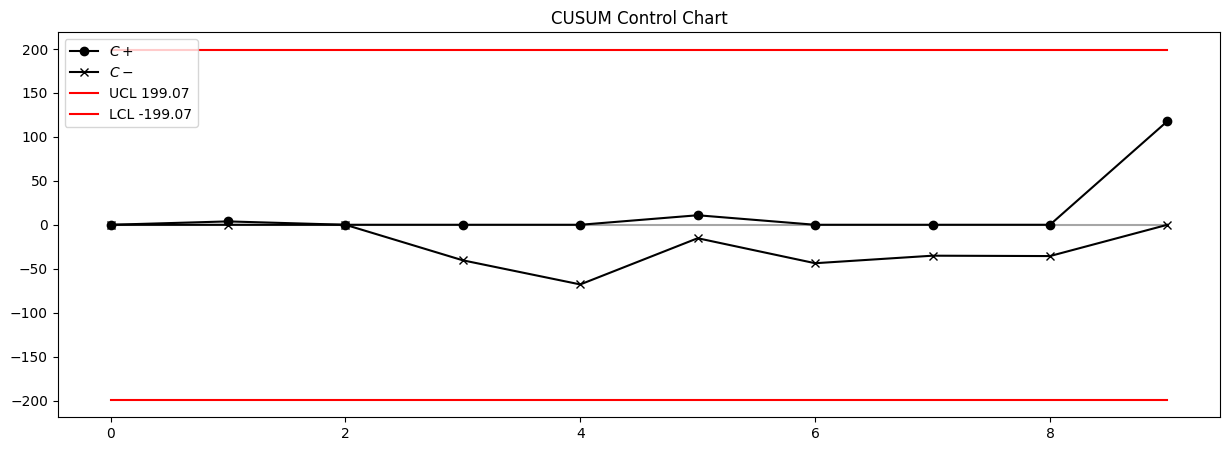

In [ ]:
chart = CUSUM()
chart.fit(data=row100_array_1, h=4.77, k=0.5, mu=x_bar_bar, sigma=sigma_hat)
chart.ControlChart()

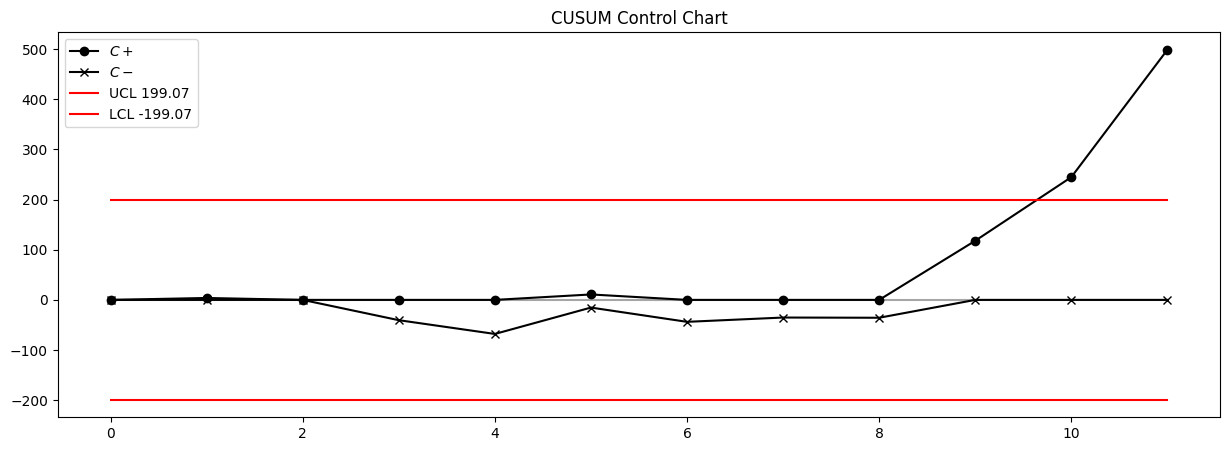

In [ ]:
chart = CUSUM()
chart.fit(data=P2_row100_array_1, h=4.77, k=0.5, mu=x_bar_bar, sigma=sigma_hat)
chart.ControlChart()

####CUSUM Layer 173

In [ ]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [ ]:
for group in row173_array_reshape:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in plotting dataset, ', m)

points in plotting dataset,  5


In [ ]:
#c4 is 0.7979 for n=2
c4=0.7979
x_bar_bar=statistics.mean(x_bar)
s_bar=statistics.mean(s)
sigma_hat=s_bar/c4
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat)

process mean is,  383.4
process standard deviation is,  42.61185612232109


In [ ]:
row173_array_1

array([436, 371, 359, 357, 298, 400, 347, 409, 374, 483])

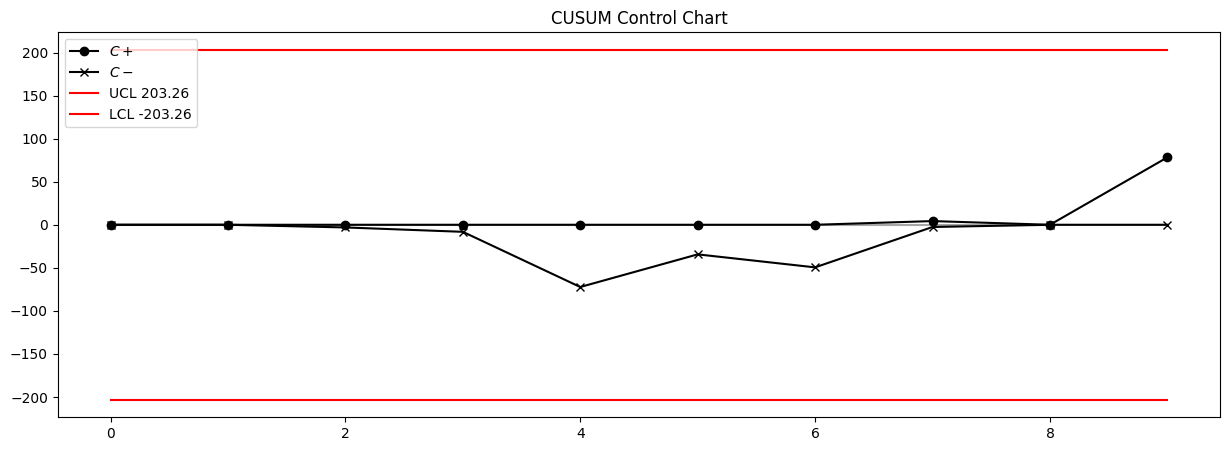

In [ ]:
chart = CUSUM()
chart.fit(data=row173_array_1, h=4.77, k=0.5, mu=x_bar_bar, sigma=sigma_hat)
chart.ControlChart()

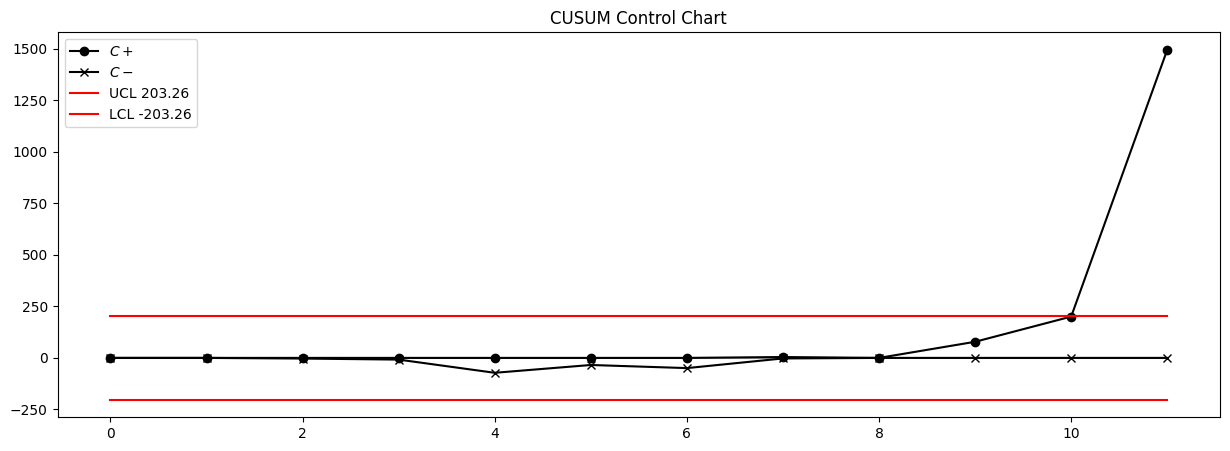

In [ ]:
chart = CUSUM()
chart.fit(data=P2_row173_array_1, h=4.77, k=0.5, mu=x_bar_bar, sigma=sigma_hat)
chart.ControlChart()

####CUSUM Layer 200

In [ ]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [ ]:
for group in row200_array_reshape:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in plotting dataset, ', m)

points in plotting dataset,  5


In [ ]:
#c4 is 0.7979 for n=2
c4=0.7979
x_bar_bar=statistics.mean(x_bar)
s_bar=statistics.mean(s)
sigma_hat=s_bar/c4
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat)

process mean is,  563.4
process standard deviation is,  48.12633162050382


In [ ]:
row200_array_1

array([616, 568, 566, 544, 465, 578, 500, 565, 548, 684])

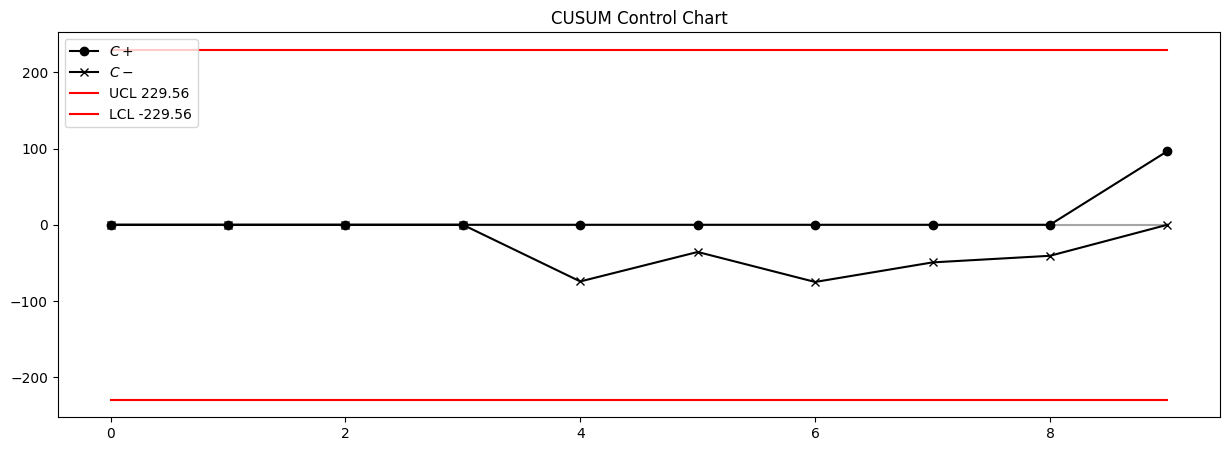

In [ ]:
chart = CUSUM()
chart.fit(data=row200_array_1, h=4.77, k=0.5, mu=x_bar_bar, sigma=sigma_hat)
chart.ControlChart()

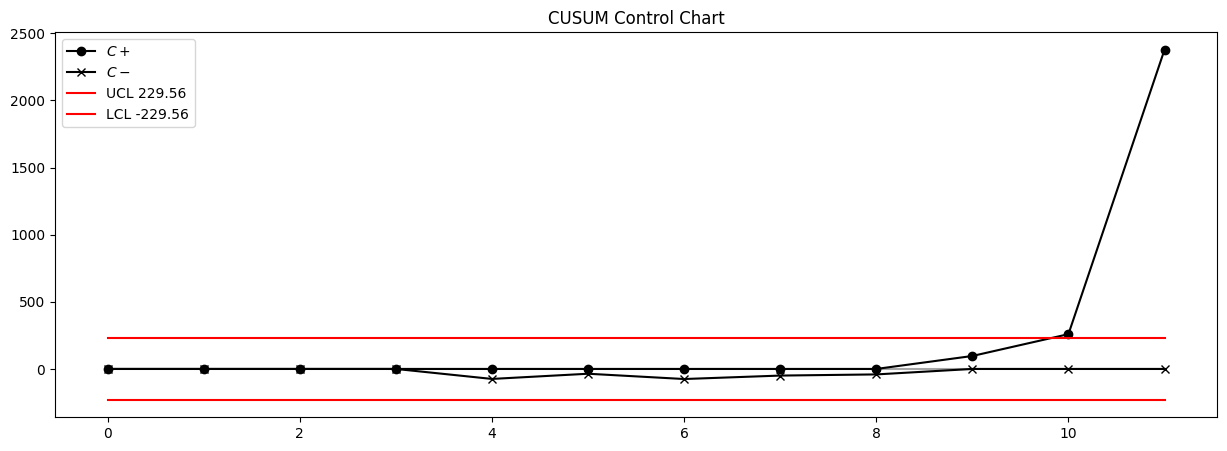

In [ ]:
chart = CUSUM()
chart.fit(data=P2_row200_array_1, h=4.77, k=0.5, mu=x_bar_bar, sigma=sigma_hat)
chart.ControlChart()

## Phase II Descriptive Statistics

In [ ]:
mean_value = P2_row100.mean(axis=1)
mean_value

100    365.5
dtype: float64

In [ ]:
stdev = P2_row100.std(axis=1)
stdev

100    101.282234
dtype: float64

In [ ]:
mean_value = P2_row173.mean(axis=1)
mean_value

173    505.083333
dtype: float64

In [ ]:
stdev = P2_row173.std(axis=1)
stdev

173    381.402307
dtype: float64

In [ ]:
mean_value = P2_row200.mean(axis=1)
mean_value

200    757.416667
dtype: float64

In [ ]:
stdev = P2_row200.std(axis=1)
stdev

200    618.019632
dtype: float64